# Quantifying Bleed

In [5]:
import os
import numpy as np
from matplotlib import pyplot as plt
import librosa as lb
import soundfile as sf
import scipy.stats

In [91]:
def correlation(x, y, type='pearson'):
    if type == 'pearson':
        corr = scipy.stats.pearsonr(x, y)[0]
    if type == 'spearman':
        corr = scipy.stats.spearmanr(x, y)[0]
    if type == 'kendall':
        corr = scipy.stats.kendalltau(x, y)[0]
        
    return corr

In [92]:
def create_chunks(data, fs):
    chunks = []
    for i in range(0, len(data), fs):
        chunks.append(data[i:i+fs])
    return np.array(chunks)

In [90]:
def st_corr(x, y, x_fs, y_fs, type='pearson'):
    
    x = create_chunks(x, x_fs)
    y = create_chunks(y, y_fs)
    
    assert len(x) == len(y)
    
    corr = []
    for i in range(len(x)):
        corr.append(correlation(x[i], y[i], type=type))
    
    return np.array(corr)

### Data 1

In [93]:
path = "/Users/rajeshr/Desktop/SaragaSortedWav/train/Aaniraimekkani/"
os.listdir(path)

['accompaniment.wav',
 'mridangam_left.wav',
 'violin.wav',
 'vocal.wav',
 'mixed.wav',
 'mridangam_right.wav']

In [94]:
vocal, fs = sf.read(path+'vocal.wav')
mixed, fs = sf.read(path+'mixed.wav')

In [95]:
vocal = vocal[:5292000] #Two minutes: fs*60*2
mixed = mixed[:5292000]

In [96]:
mixed = np.mean(mixed, axis=1)

In [97]:
fs, len(vocal), len(mixed)

(44100, 5292000, 5292000)

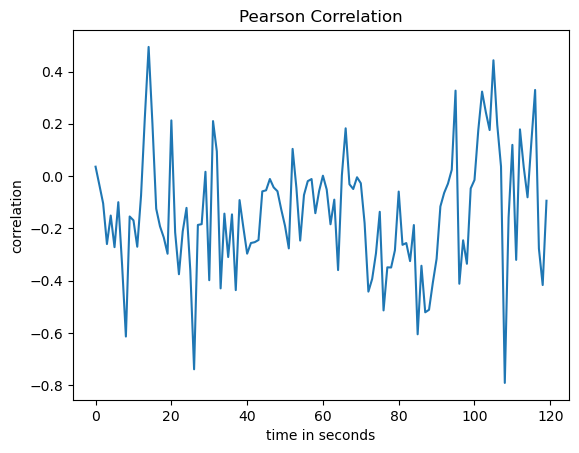

In [98]:
pearson_corr = st_corr(vocal, mixed, fs, fs, type='pearson')
plt.plot(pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.show()

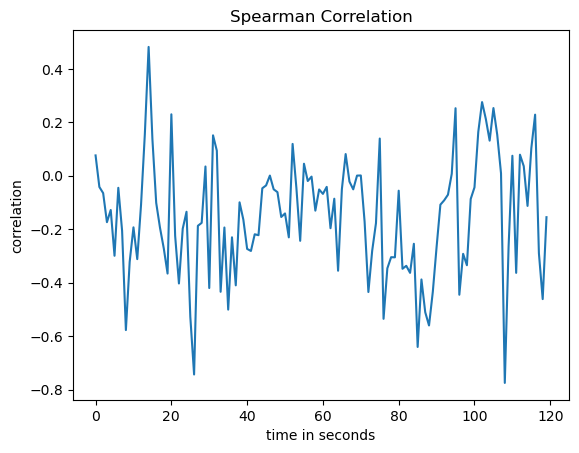

In [57]:
spearman_corr = st_corr(vocal, mixed, fs, fs, type='spearman')
plt.plot(spearman_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Spearman Correlation')
plt.show()

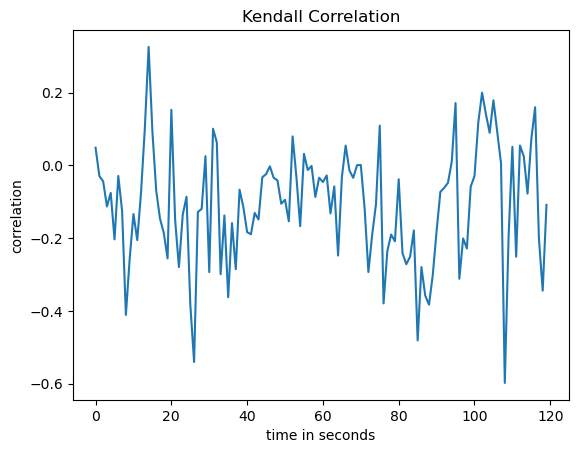

In [70]:
kendall_corr = st_corr(vocal, mixed, fs, fs, type='kendall')
plt.plot(kendall_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Kendall Correlation')
plt.show()

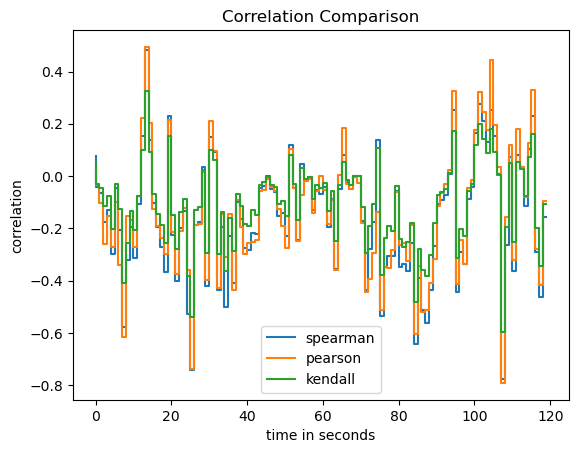

In [73]:
plt.step(np.arange(len(spearman_corr)), spearman_corr)
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.step(np.arange(len(kendall_corr)), kendall_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Correlation Comparison')
plt.legend(['spearman', 'pearson', 'kendall'])
plt.show()

### Data 2

In [74]:
path2 = "/Users/rajeshr/Desktop/Research/Datasets/Sample Sounds/"

In [79]:
v, vfs = lb.load(path2+'Voice.wav')
m, mfs = lb.load(path2+'Music.wav')

In [84]:
v = v[:211210] #10 seconds: fs*10
m = m[:211210]

In [85]:
len(v), len(m), vfs, mfs

(211210, 211210, 22050, 22050)

/var/folders/3t/vg36gb2936s7j53bxphjbg1c0000gn/T/ipykernel_14970/2956042053.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(chunks)


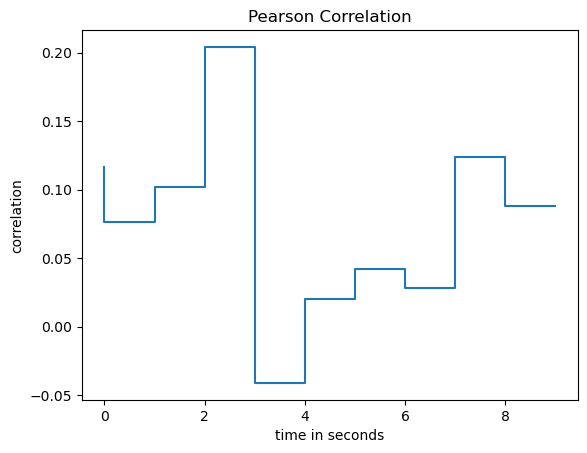

In [101]:
pearson_corr = st_corr(v, m, vfs, mfs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.show()

/var/folders/3t/vg36gb2936s7j53bxphjbg1c0000gn/T/ipykernel_14970/2956042053.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(chunks)


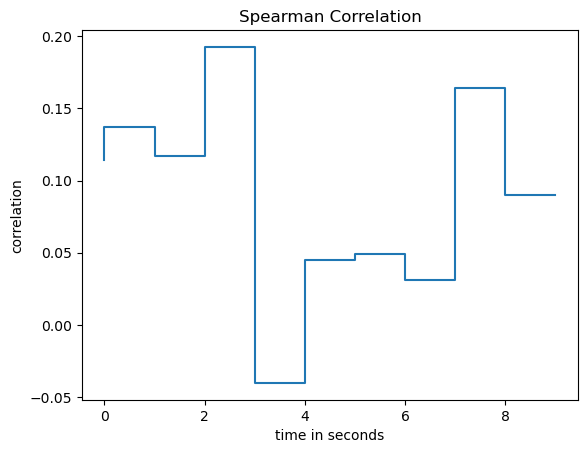

In [102]:
spearman_corr = st_corr(v, m, vfs, mfs, type='spearman')
plt.step(np.arange(len(spearman_corr)), spearman_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Spearman Correlation')
plt.show()

/var/folders/3t/vg36gb2936s7j53bxphjbg1c0000gn/T/ipykernel_14970/2956042053.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(chunks)


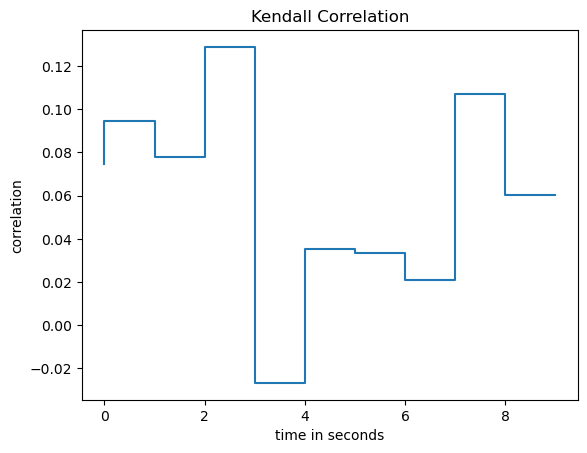

In [104]:
kendall_corr = st_corr(v, m, vfs, mfs, type='kendall')
plt.step(np.arange(len(kendall_corr)), kendall_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Kendall Correlation')
plt.show()

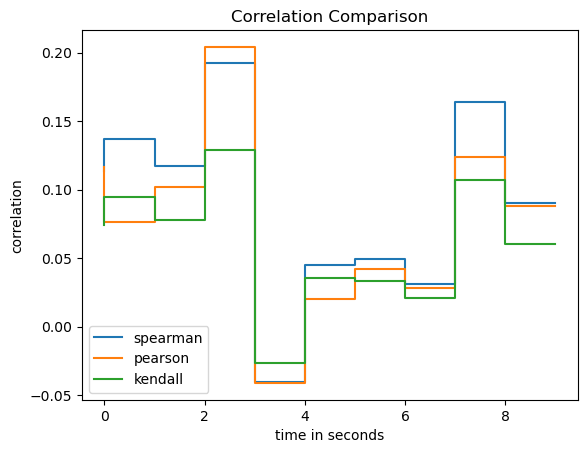

In [105]:
plt.step(np.arange(len(spearman_corr)), spearman_corr)
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.step(np.arange(len(kendall_corr)), kendall_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Correlation Comparison')
plt.legend(['spearman', 'pearson', 'kendall'])
plt.show()

### Data 3

In [110]:
path3 = "/Users/rajeshr/Documents/Music/"
#os.listdir(path3)

In [108]:
song1, s1fs = lb.load(path3+'Yaarenna-Sonnalum.mp3')
song2, s2fs = lb.load(path3+'Amma_Amma_(KuttyWap.com).mp3')

/Users/rajeshr/miniforge3/envs/all/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [111]:
song1.shape, song2.shape, s1fs, s2fs

((6397440,), (6716928,), 22050, 22050)

In [115]:
song1 = song1[:2646000] #2 min: fs*60*2
song2 = song2[:2646000]

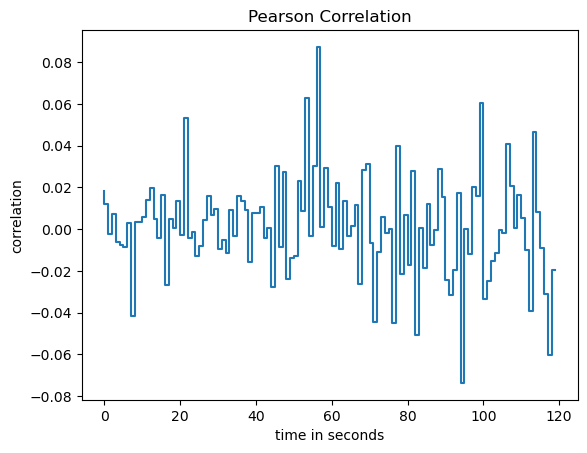

In [116]:
pearson_corr = st_corr(song1, song2, s1fs, s2fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.show()

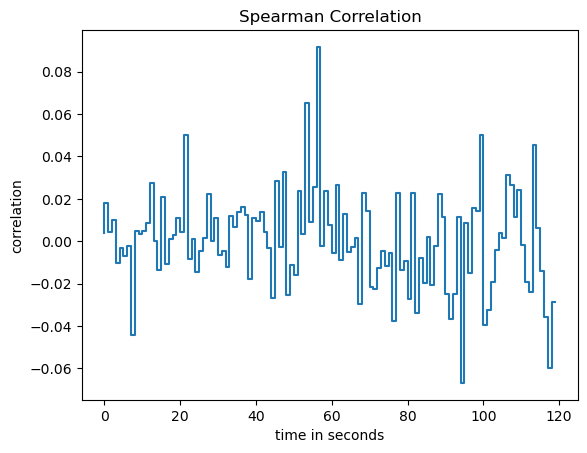

In [117]:
spearman_corr = st_corr(song1, song2, s1fs, s2fs, type='spearman')
plt.step(np.arange(len(spearman_corr)), spearman_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Spearman Correlation')
plt.show()

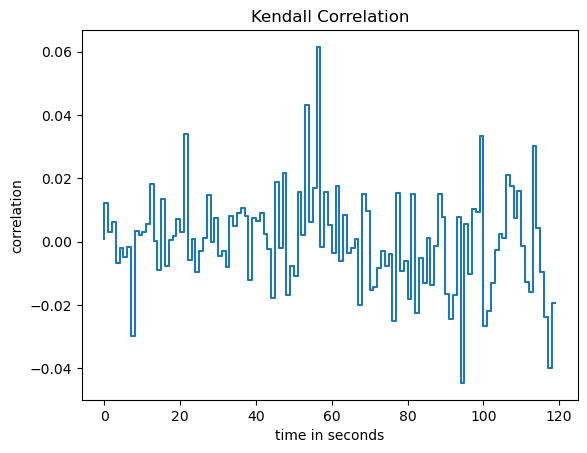

In [119]:
kendall_corr = st_corr(song1, song2, s1fs, s2fs, type='kendall')
plt.step(np.arange(len(kendall_corr)), kendall_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Kendall Correlation')
plt.show()

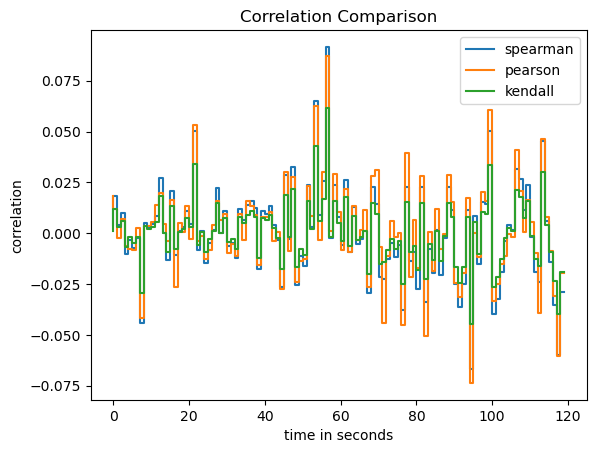

In [120]:
plt.step(np.arange(len(spearman_corr)), spearman_corr)
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.step(np.arange(len(kendall_corr)), kendall_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Correlation Comparison')
plt.legend(['spearman', 'pearson', 'kendall'])
plt.show()